In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

In [3]:
data_train_path=r"C:\Users\bhara\Internship_1\Hand_gestures\Train"
data_test_path=r"C:\Users\bhara\Internship_1\Hand_gestures\Test"
data_validation_path=r"C:\Users\bhara\Internship_1\Hand_gestures\Validation"

In [4]:
img_width=180
img_height=180

In [5]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 12000 files belonging to 10 classes.


In [6]:
data_cat=data_train.class_names
data_cat

['C',
 'Down',
 'Fist',
 'Fist_moved',
 'I',
 'Index',
 'Ok',
 'Palm',
 'Palm_moved',
 'Thumb']

In [7]:
data_validation=tf.keras.utils.image_dataset_from_directory(data_validation_path,shuffle=False,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 4000 files belonging to 10 classes.


In [8]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,shuffle=False,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 4000 files belonging to 10 classes.


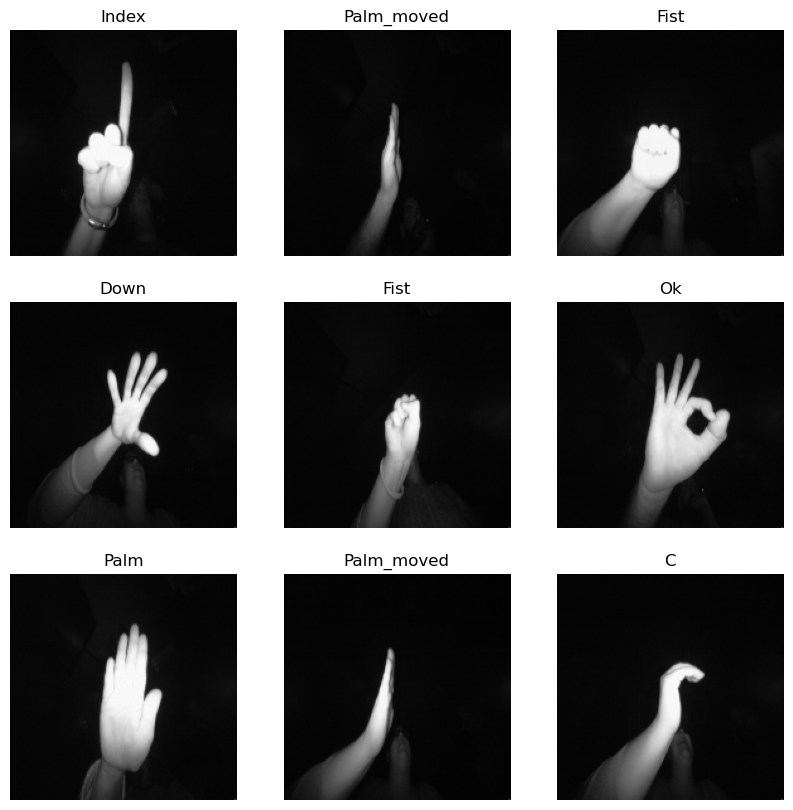

In [9]:
plt.figure(figsize=(10,10))
for image,label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[label[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [18]:
epoch_data=30
history=model.fit(data_train,validation_data=data_validation,epochs=epoch_data,batch_size=32,verbose=1)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 98s 255ms/step - accuracy: 0.8089 - loss: 0.5666 - val_accuracy: 0.8055 - val_loss: 2.5566
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 96s 256ms/step - accuracy: 0.9953 - loss: 0.0161 - val_accuracy: 0.7345 - val_loss: 2.5893
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 96s 256ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.7657 - val_loss: 2.7263
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 122s 326ms/step - accuracy: 0.9973 - loss: 0.0131 - val_accuracy: 0.7582 - val_loss: 3.4381
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 179s 477ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.7728 - val_loss: 2.5275
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 313ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.7515 - val_loss: 3.7961
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 94s 249ms/step - accuracy: 1.0000 - loss: 2.3049e-05 - val_accuracy: 0.7542 - val_loss: 4.0312
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 245ms/step - accuracy: 0.9999 - 

Text(0.5, 1.0, 'Loss')

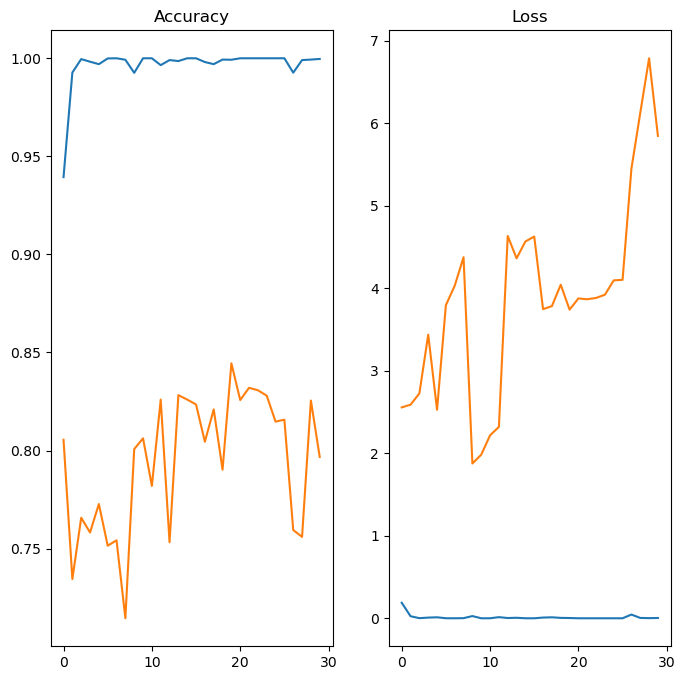

In [19]:
epochs_range=range(epoch_data)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [47]:
image='frame_02_08_0009.png'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [48]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


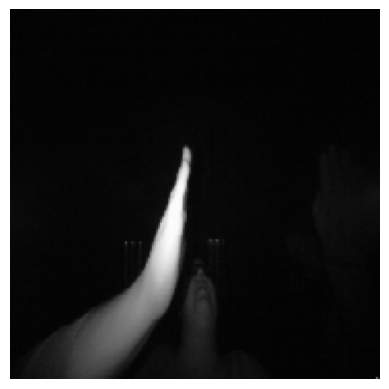

Image is Palm_moved with accuracy of 100.00


In [52]:
plt.imshow(tf.keras.utils.array_to_img(img_arr))
plt.axis('off') 
plt.show()
score=tf.nn.softmax(predict)
print('Image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))